# <b>SC1015 Mini-Project: Predicting Natural Disasters from Increasing Temperatures</b>
### Group 6 Members: Foo Jen Sean, Jeffrey Lim Yi Ren, Karishein Chandran

---

# Exploratory Data Analysis - EDA

## Installing Libraries and Modules 

In [ ]:
!pip install --upgrade geopandas
!pip install --upgrade pyshp
!pip install --upgrade shapely
!pip install --upgrade descartes

     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 6.3 MB 34.8 MB/s 
     |████████████████████████████████| 16.7 MB 48.0 MB/s 
     |████████████████████████████████| 44 kB 1.4 MB/s 


In [ ]:
# Basic Libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import geopandas as gpd
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

# Exploratory Data Analysis (EDA) on Disaster Dataset


## Importing the Datasets


The dataset can be found here: https://www.kaggle.com/brsdincer/all-natural-disasters-19002021-eosdis

In [ ]:
url = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/DISASTERS/1970-2021_DISASTERS.xlsx%20-%20emdat%20data.csv'
disasterData = pd.read_csv(url)
disasterData = disasterData[disasterData.Year <= 2020]
disasterData.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [ ]:
disasterData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14329 entries, 0 to 14590
Data columns (total 47 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Dis No                           14329 non-null  object 
 1   Year                             14329 non-null  int64  
 2   Seq                              14329 non-null  int64  
 3   Glide                            1532 non-null   object 
 4   Disaster Group                   14329 non-null  object 
 5   Disaster Subgroup                14329 non-null  object 
 6   Disaster Type                    14329 non-null  object 
 7   Disaster Subtype                 11714 non-null  object 
 8   Disaster Subsubtype              1007 non-null   object 
 9   Event Name                       3583 non-null   object 
 10  Country                          14329 non-null  object 
 11  ISO                              14329 non-null  object 
 12  Region            

In [ ]:
disasterData.describe().round(3)

,Year,Seq,Aid Contribution,Dis Mag Value,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI
count,14329.000,14329.000,6.770000e+02,4.521000e+03,14329.000,14063.000,11279.000,14329.000,13780.000,11350.000,10008.000,3568.000,8.606000e+03,2.225000e+03,1.077100e+04,3.100000e+01,1.090000e+03,4.783000e+03,14329.000
mean,2001.170,734.665,1.254136e+05,5.141762e+04,2001.180,6.444,15.221,2001.231,6.579,15.783,367.740,2518.277,9.065141e+05,7.296721e+04,7.402096e+05,2.392251e+06,7.972982e+05,7.673862e+05,68.763
std,12.337,1918.031,2.997875e+06,3.227576e+05,12.335,3.404,8.968,12.338,3.361,8.876,6556.497,34396.323,8.797970e+06,5.299228e+05,7.946936e+06,5.229397e+06,3.062718e+06,4.915721e+06,21.429
min,1970.000,1.000,1.000000e+00,-5.700000e+01,1970.000,1.000,1.000,1970.000,1.000,1.000,1.000,1.000,1.000000e+00,6.000000e+00,1.000000e+00,8.400000e+01,3.400000e+01,2.000000e+00,15.001
25%,1993.000,129.000,1.750000e+02,7.000000e+00,1993.000,4.000,7.000,1993.000,4.000,8.000,5.000,13.000,1.200000e+03,5.300000e+02,6.500000e+02,1.200000e+04,5.000000e+04,1.000000e+04,55.816
50%,2002.000,303.000,7.210000e+02,1.800000e+02,2003.000,7.000,15.000,2003.000,7.000,16.000,16.000,50.000,1.000000e+04,3.000000e+03,5.926000e+03,1.940000e+05,1.700000e+05,7.000000e+04,69.500
75%,2011.000,503.000,3.511000e+03,1.565000e+04,2011.000,9.000,23.000,2011.000,9.000,24.000,50.000,200.000,9.000000e+04,1.648700e+04,5.700000e+04,1.520376e+06,5.000000e+05,3.500000e+05,86.912
max,2020.000,9881.000,7.800000e+07,1.302587e+07,2021.000,12.000,31.000,2021.000,12.000,31.000,300000.000,1800000.000,3.300000e+08,1.585000e+07,3.300000e+08,2.500000e+07,6.000000e+07,2.100000e+08,100.000


Hydrological         5815
Meteorological       4504
Biological           1525
Geophysical          1373
Climatological       1111
Extra-terrestrial       1
Name: Disaster Subgroup, dtype: int64


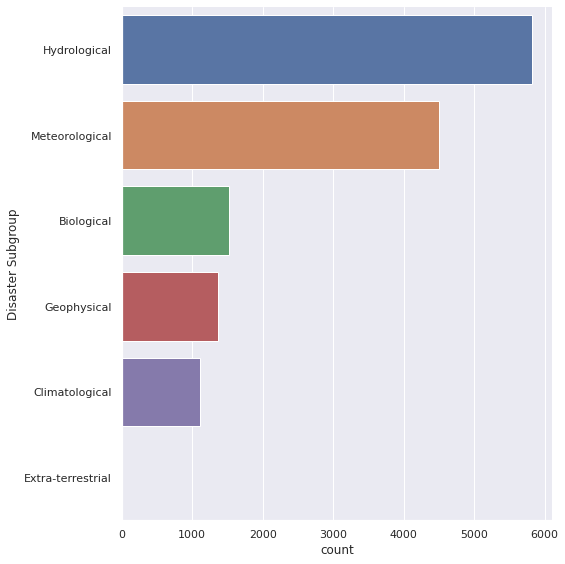

In [ ]:
print(disasterData["Disaster Subgroup"].value_counts())
sb.catplot(y = "Disaster Subgroup", data = disasterData, kind = "count", 
           order = disasterData["Disaster Subgroup"].value_counts().index, height = 8)

In [ ]:
disasterData["Year"].value_counts().sort_index()

1970     82
1971     63
1972     63
1973     65
1974     72
1975     67
1976     99
1977    141
1978    137
1979    122
1980    144
1981    146
1982    150
1983    206
1984    156
1985    175
1986    174
1987    227
1988    234
1989    189
1990    303
1991    266
1992    232
1993    267
1994    255
1995    277
1996    273
1997    323
1998    363
1999    416
2000    523
2001    447
2002    532
2003    392
2004    405
2005    498
2006    446
2007    449
2008    400
2009    384
2010    441
2011    357
2012    370
2013    353
2014    348
2015    398
2016    350
2017    371
2018    338
2019    442
2020    398
Name: Year, dtype: int64

In [ ]:
print(disasterData["Disaster Type"].value_counts())

Flood                   5112
Storm                   3922
Epidemic                1431
Earthquake              1118
Landslide                703
Drought                  675
Extreme temperature      582
Wildfire                 436
Volcanic activity        214
Insect infestation        93
Mass movement (dry)       41
Impact                     1
Animal accident            1
Name: Disaster Type, dtype: int64


In [ ]:
averageDeaths = disasterData['Total Deaths'].mean()
averageAffected = disasterData["Total Affected"].mean()
averageDamages = disasterData["Total Damages ('000 US$)"].mean()
avgDeathAffectedDamages = pd.DataFrame([[int(averageDeaths), \
int(averageAffected), "USD $ " + str(round(averageDamages, 2))]], \
columns=["Average Deaths", "Average Affected", "Average Damages"]);
avgDeathAffectedDamages = avgDeathAffectedDamages.rename(index={0: 'Value'})
avgDeathAffectedDamages

,Average Deaths,Average Affected,Average Damages
Value,367,740209,USD $ 767386.15


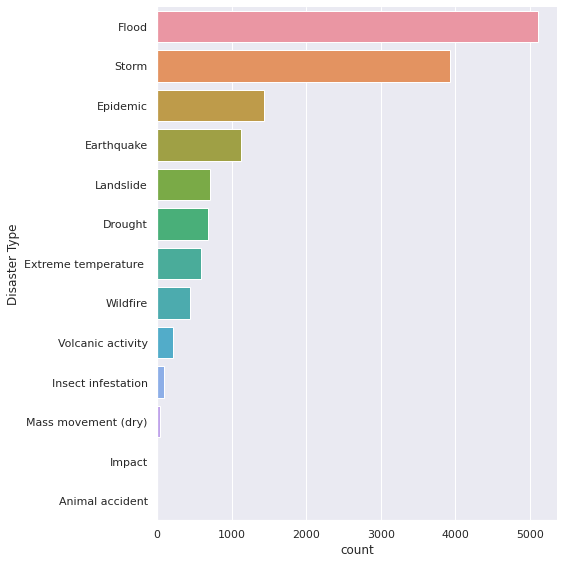

In [ ]:
sb.catplot(y = "Disaster Type", data = disasterData, kind = "count", 
           order = disasterData["Disaster Type"].value_counts().index, height = 8)

The map below displays the type of natural disasters and where it occurs the most in different parts of the world from 1970 - 2020

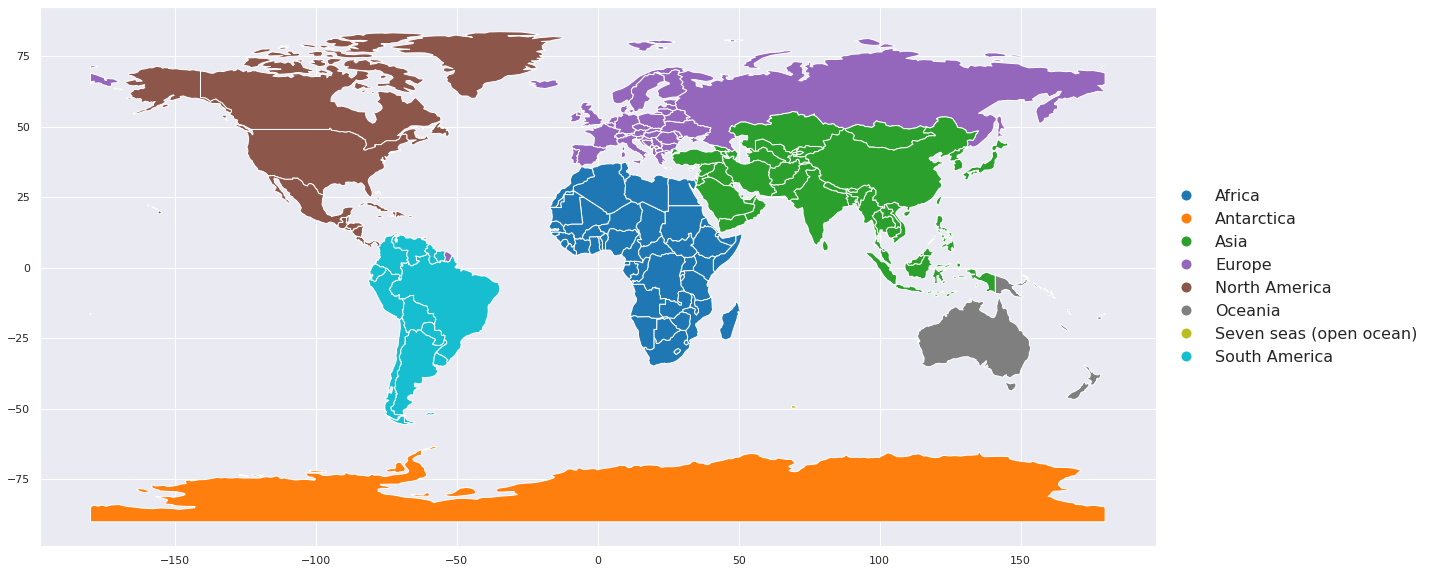

In [ ]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(column = 'continent', figsize = (20,20), legend = True, 
           legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fontsize':16, 'frameon': False})

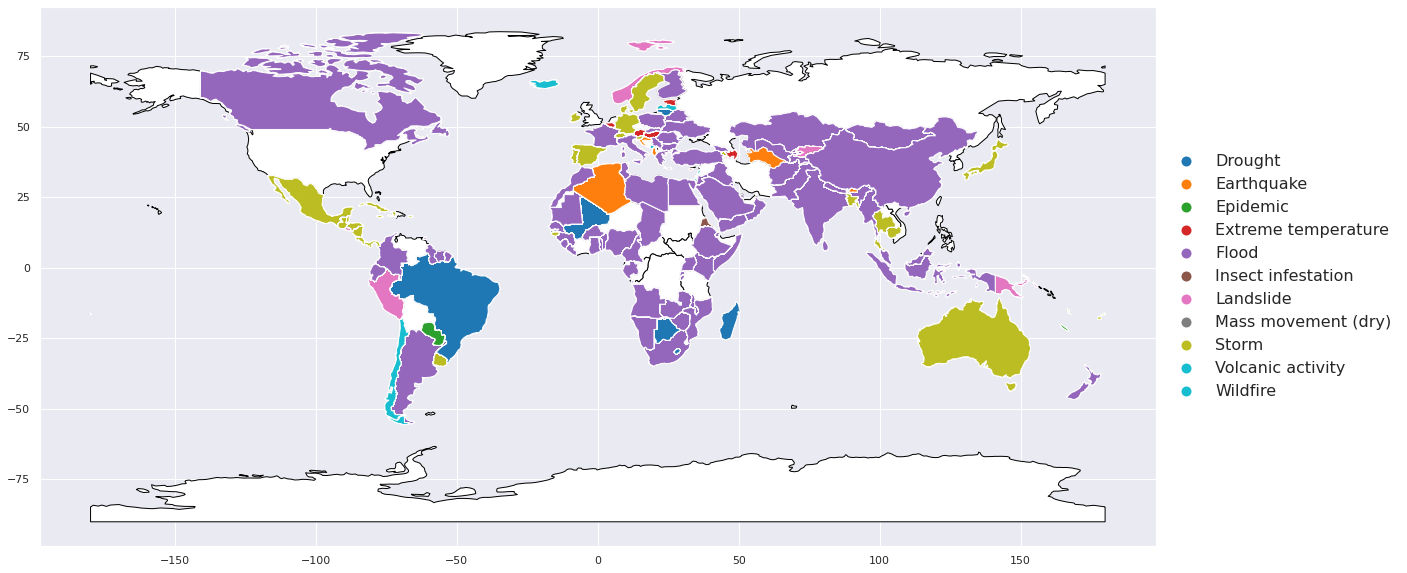

In [ ]:
# create new data frame to only contain countries and the type of natural disasters that occur
countries = disasterData[['Country', 'Disaster Type']].copy()
countries.rename(columns = {'Country':'name'}, inplace = True)

# combine the countries dataframe with the world geopanda dataframe
merged = world.merge(countries, on='name', how = "left")

# plotting the data on the world map
fig, ax1 = plt.subplots(figsize=(20, 20))

# plot world map as base
world.plot(ax=ax1, color = 'white', edgecolor='black')

# plot the natural disasters location above world map
merged.plot(column = 'Disaster Type', ax=ax1, legend = True,
            legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fontsize':16, 'frameon': False})

In [ ]:
disasterCountPerYear = pd.DataFrame(disasterData["Year"].value_counts().rename_axis('Year').reset_index(name='No. Of Disasters'))
disasterCountPerYear.set_index("Year", inplace = True)
disasterCountPerYear.sort_index(inplace = True)
disasterCountPerYear.head()

,No. Of Disasters
Year,
1970,82
1971,63
1972,63
1973,65
1974,72


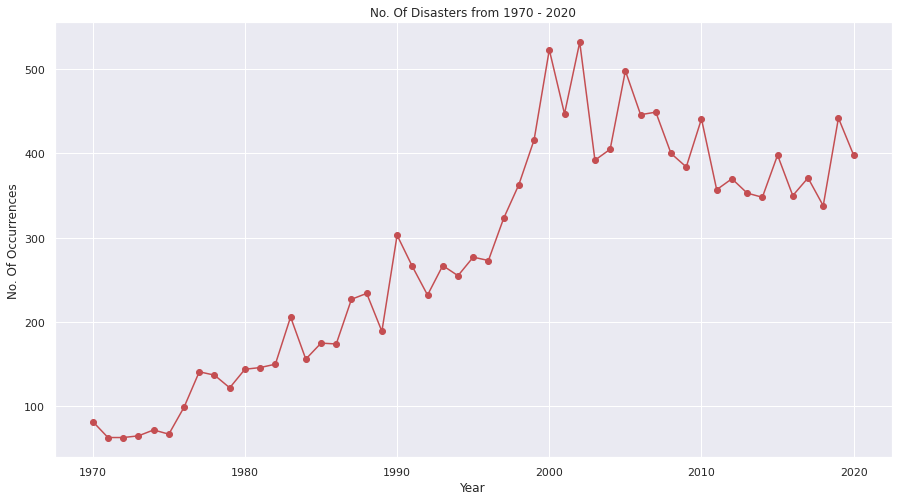

In [ ]:
plt.figure(figsize=(15,8))
plt.title("No. Of Disasters from 1970 - 2020")
plt.xlabel('Year')
plt.ylabel('No. Of Occurrences')
plt.plot(disasterCountPerYear['No. Of Disasters'], 'r', marker="o")

plt.show()

In [ ]:
disasterTypesPerYear = pd.DataFrame(disasterData[["Year", "Disaster Type"]].value_counts().reset_index(name='No. Of Disasters'))
disasterTypesPerYear.head()

,Year,Disaster Type,No. Of Disasters
0,2006,Flood,226
1,2007,Flood,218
2,2020,Flood,201
3,2019,Flood,196
4,2005,Flood,193


In [ ]:
columnHeaders = disasterTypesPerYear["Disaster Type"].unique().tolist()
columnHeaders.insert(0, "Year")
rowHeaders = disasterTypesPerYear["Year"].unique().tolist()
yearDisasterMatrix = pd.DataFrame(columns=columnHeaders)

for i in range(len(rowHeaders)):
  yearDisasterMatrix.loc[i] = [rowHeaders[i], 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] # set all values to 0 first

yearDisasterMatrix.set_index("Year", inplace = True)
yearDisasterMatrix.sort_index(inplace = True)

for row in disasterTypesPerYear.iterrows():
  yearDisasterMatrix.at[row[1][0], row[1][1]] = row[1][2] # add data from previous dataframe
    
yearDisasterMatrix.drop(columns=["Animal accident", "Impact"], inplace=True)
yearDisasterMatrix

,Flood,Storm,Epidemic,Extreme temperature,Earthquake,Landslide,Wildfire,Drought,Insect infestation,Volcanic activity,Mass movement (dry)
Year,,,,,,,,,,,
1970,31,24,4,0,12,6,3,2,0,0,0
1971,15,22,2,1,6,5,2,6,0,3,1
1972,15,26,1,2,7,5,3,4,0,0,0
1973,20,22,0,3,8,5,3,3,0,1,0
1974,19,28,2,0,6,10,3,3,1,0,0
1975,18,28,1,3,5,5,2,1,1,3,0
1976,17,36,3,0,21,6,1,10,0,5,0
1977,48,32,22,1,15,3,2,13,0,5,0
1978,47,42,21,1,9,2,3,8,2,2,0


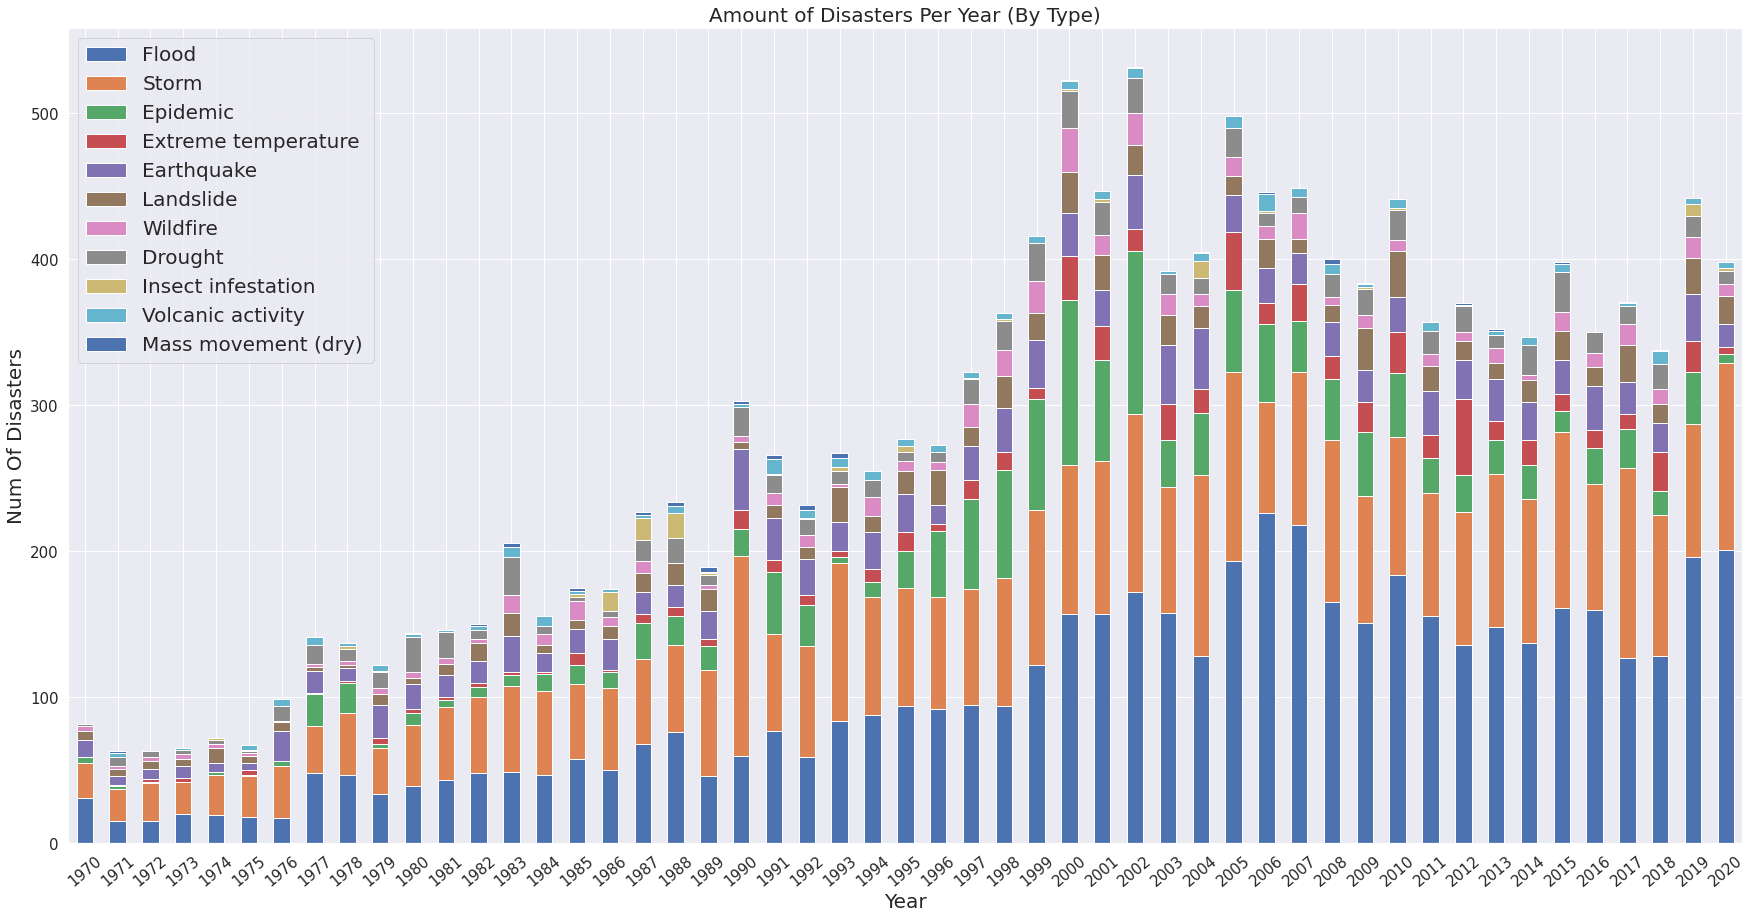

In [ ]:
yearDisasterMatrix.plot(kind="bar", stacked=True, figsize=(30,15), fontsize=15, rot=40)
plt.title("Amount of Disasters Per Year (By Type)", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Num Of Disasters", fontsize=20)
plt.legend(fontsize=20)

In [ ]:
# disasterData["Disaster Type"] != "Animal accident"
disasterData = disasterData[disasterData["Disaster Type"] != "Animal accident"]
disasterData = disasterData[disasterData["Disaster Type"] != "Impact"]
disasterData

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14586,2020-0175-COD,2020,175,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,92580.0,NaN,NaN,NaN,100.000000,2,NaN,14995;74354,"Bukavu, Sud-Kivu (Adm2)."
14587,2020-0031-ZMB,2020,31,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,1500.0,NaN,NaN,NaN,100.000000,2,NaN,65194;65195;65229;65237,"Gwembe, Lundazi, Mambwe, Siavonga (Adm2)."
14588,2020-0110-ZMB,2020,110,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,700000.0,NaN,NaN,NaN,100.000000,2,NaN,65204;65220;65226,"Nakonde, Samfya, Solwezi (Adm2)."
14589,2020-0131-TLS,2020,131,NaN,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,...,NaN,9131.0,NaN,NaN,20000.0,100.000000,2,NaN,82648;82649;82650;82651,"Cristo Rei, Dom Aleixo, Nein Feto, Vera Cruz (..."


In [ ]:
disasterCountPerYear = pd.DataFrame(disasterData["Year"].value_counts().rename_axis('Year').reset_index(name='No. Of Disasters'))
disasterCountPerYear.set_index("Year", inplace = True)
disasterCountPerYear.sort_index(inplace = True)
disasterCountPerYear.head()

,No. Of Disasters
Year,
1970,82
1971,63
1972,63
1973,65
1974,72


**Observations**

1. After performing EDA on disaster dataset, it is noticeable that both flood and storm disasters have the highest number of occurences in a year.

2. There seem to be a upward trend in the occurences of disasters from 1970 to 2002 which slowly leveled out there after.  

3. Flooding occurs in most of the continents

4. We are only interested in the disaster occurence each year as the rest of the variables are irrelevant at this point in time of our project

5. 


# Exploratory Data Analysis (EDA) on Temperature Dataset

Dataset can be found here: https://www.fao.org/faostat/en/#data/ET/metadata

## Importing the Dataset

In [ ]:
link1 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/climate-change-temperature.csv'
link2 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/co2_mm_mlo.csv'
link3 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/ch4_mm_gl.csv'
link4 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/n2o_mm_gl.csv'
tempData = pd.read_csv(link1)
co2Data = pd.read_csv(link2)
ch4Data = pd.read_csv(link3)
n2oData = pd.read_csv(link4)
tempData

,Entity,Code,Day,temperature_anomaly
0,Northern Hemisphere,NaN,1880-01-15,-0.35
1,Northern Hemisphere,NaN,1880-02-15,-0.51
2,Northern Hemisphere,NaN,1880-03-15,-0.23
3,Northern Hemisphere,NaN,1880-04-15,-0.30
4,Northern Hemisphere,NaN,1880-05-15,-0.06
...,...,...,...,...
5110,World,OWID_WRL,2021-09-15,0.92
5111,World,OWID_WRL,2021-10-15,0.99
5112,World,OWID_WRL,2021-11-15,0.93
5113,World,OWID_WRL,2021-12-15,0.86


## Temperature (°C)

In [ ]:
# link1 = 'https://raw.githubusercontent.com/Dumbledore66/Mini-Project/main/climate-change-temperature.csv'
tempData = pd.read_csv(link1)
tempData = tempData[tempData.Entity == 'World']

tempData = tempData.set_index('Day')
tempData.index = tempData.index.astype(str)
tempData.index = pd.DatetimeIndex(tempData.index).to_period("M")
tempData.index = tempData.index.to_timestamp()

In [ ]:
tempData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1705 entries, 1880-01-01 to 2022-01-01
Freq: MS
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Entity               1705 non-null   object 
 1   Code                 1705 non-null   object 
 2   temperature_anomaly  1705 non-null   float64
dtypes: float64(1), object(2)
memory usage: 53.3+ KB


In [ ]:
tempData.describe()


,temperature_anomaly
count,1705.000000
mean,0.055801
std,0.376738
min,-0.810000
25%,-0.220000
50%,-0.040000
75%,0.270000
max,1.370000


In [ ]:
tempData = tempData[tempData.Entity == 'World']
tempData.head()

,Entity,Code,temperature_anomaly
Day,,,
1880-01-01,World,OWID_WRL,-0.17
1880-02-01,World,OWID_WRL,-0.23
1880-03-01,World,OWID_WRL,-0.08
1880-04-01,World,OWID_WRL,-0.15
1880-05-01,World,OWID_WRL,-0.09


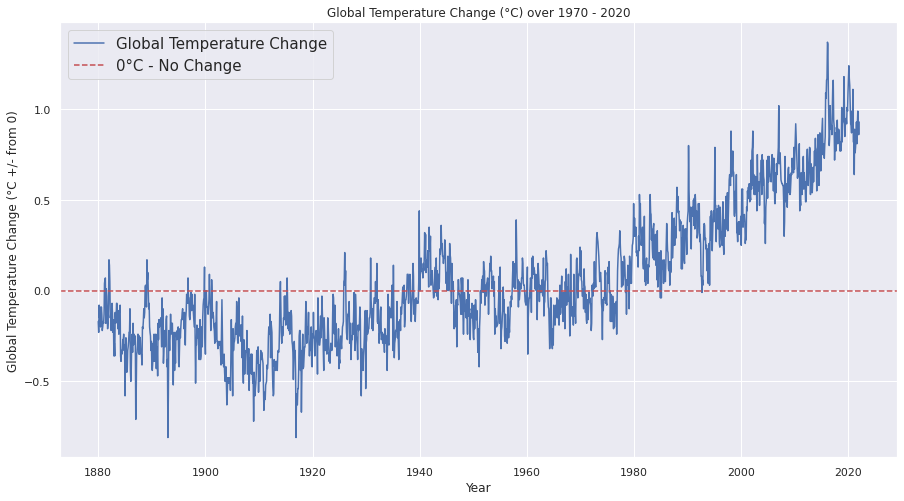

In [ ]:
from matplotlib import dates
fig, ax = plt.subplots(figsize=(15, 8))

plt.title("Global Temperature Change (°C) over 1970 - 2020")
plt.xlabel('Year')
plt.ylabel('Global Temperature Change (°C +/- from 0)')
# tempData["Temperature Change"].plot(color="b", legend=True)
plt.plot(tempData["temperature_anomaly"], color="b")
plt.axhline(y=0, color='r', linestyle='--')
plt.legend(["Global Temperature Change", "0°C - No Change"], loc=0, prop={"size":15})

plt.show()

In [ ]:
disasterCountPerYear.index = pd.to_datetime(disasterCountPerYear.index, format='%Y')
disasterCountPerYear

,No. Of Disasters
Year,
1970-01-01,82
1971-01-01,63
1972-01-01,63
1973-01-01,65
1974-01-01,72
1975-01-01,67
1976-01-01,99
1977-01-01,141
1978-01-01,137


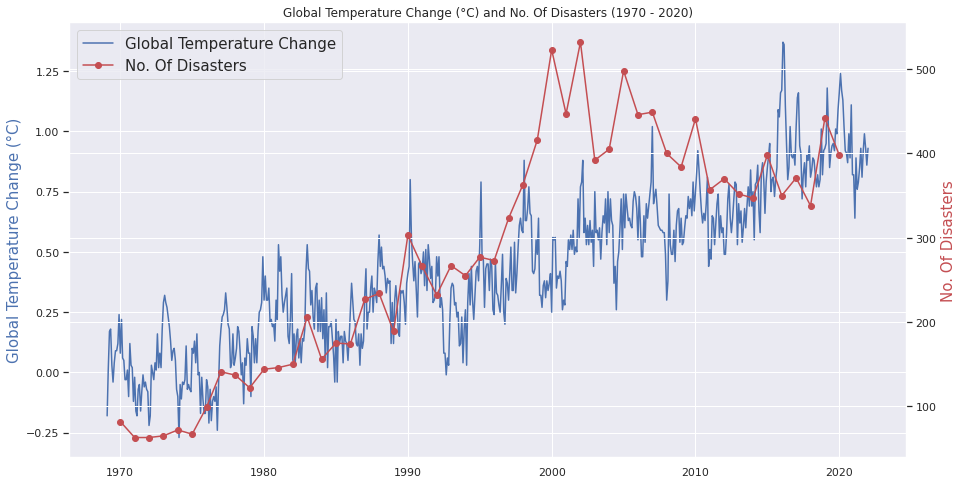

In [ ]:
from matplotlib import dates
fig, ax = plt.subplots(figsize=(15, 8))
ax2 = ax.twinx()
temp_line, = ax.plot(tempData["temperature_anomaly"].iloc[tempData.index > "1969"], color="b")
disaster_line, = ax2.plot(disasterCountPerYear['No. Of Disasters'], 'r', marker="o")

plt.title("Global Temperature Change (°C) and No. Of Disasters (1970 - 2020)")
plt.xlabel('Year')
plt.ylabel('Global Temperature Change (°C +/- from 0)')
plt.legend((temp_line, disaster_line),["Global Temperature Change", "No. Of Disasters"], loc=2, prop={"size":15})
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('No. Of Disasters', fontsize = 15, color = 'r')

plt.show()

# Exploratory Data Anaysis (EDA) on Greenhouse gases datasets 

## Carbon Dioxide (CO2)

In [ ]:
co2Data['Date'] = pd.to_datetime(co2Data[['year', 'month']].assign(Day=15))
co2Data = co2Data.set_index('Date').to_period('M')
co2Data.index = co2Data.index.to_timestamp()
co2Data.head()

,year,month,decimal date,average,interpolated,trend,ndays,Unnamed: 7
Date,,,,,,,,
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


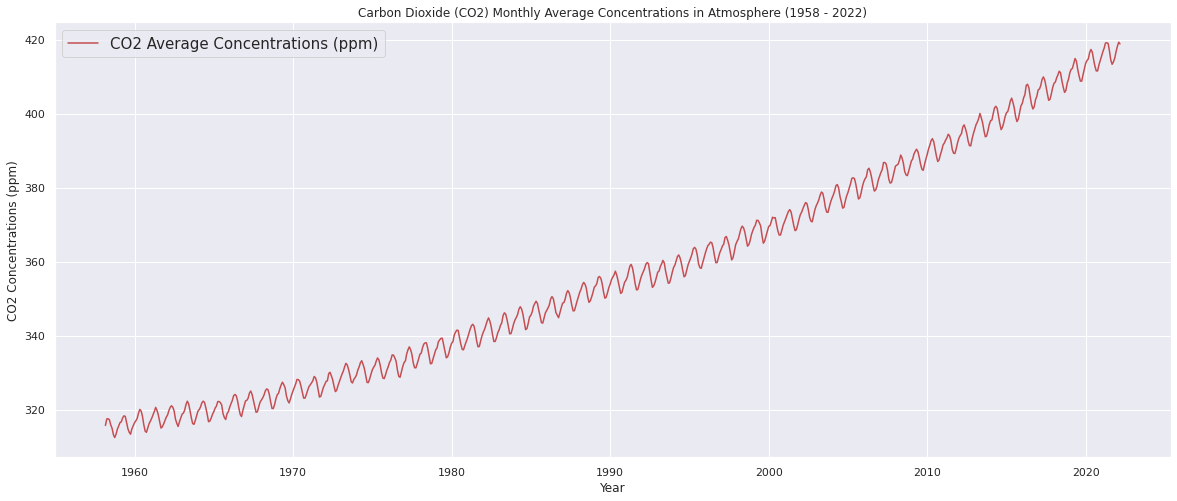

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Carbon Dioxide (CO2) Monthly Average Concentrations in Atmosphere (1958 - 2022)")
plt.xlabel("Year")
plt.ylabel("CO2 Concentrations (ppm)")

co2_line = plt.plot(co2Data["average"], color="r")
plt.legend((co2_line), ("CO2 Average Concentrations (ppm)",), loc=0, prop={"size":15})
# plt.annotate(s="Start of\nIndustrial Revolution", xy=(1760,280), xytext=(1760,300), arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.show()

## Methane (CH4)

In [ ]:
ch4Data['Date'] = pd.to_datetime(ch4Data[['year', 'month']].assign(Day=15))
ch4Data = ch4Data.set_index('Date').to_period('M')
ch4Data.index = ch4Data.index.to_timestamp()
ch4Data.head()

,year,month,decimal,average,average_unc,trend,trend_unc
Date,,,,,,,
1983-07-01,1983,7,1983.542,1625.9,2.3,1635.1,1.5
1983-08-01,1983,8,1983.625,1628.1,2.9,1635.6,1.4
1983-09-01,1983,9,1983.708,1638.4,2.3,1636.1,1.3
1983-10-01,1983,10,1983.792,1644.8,1.4,1636.7,1.2
1983-11-01,1983,11,1983.875,1642.6,0.8,1637.4,1.2


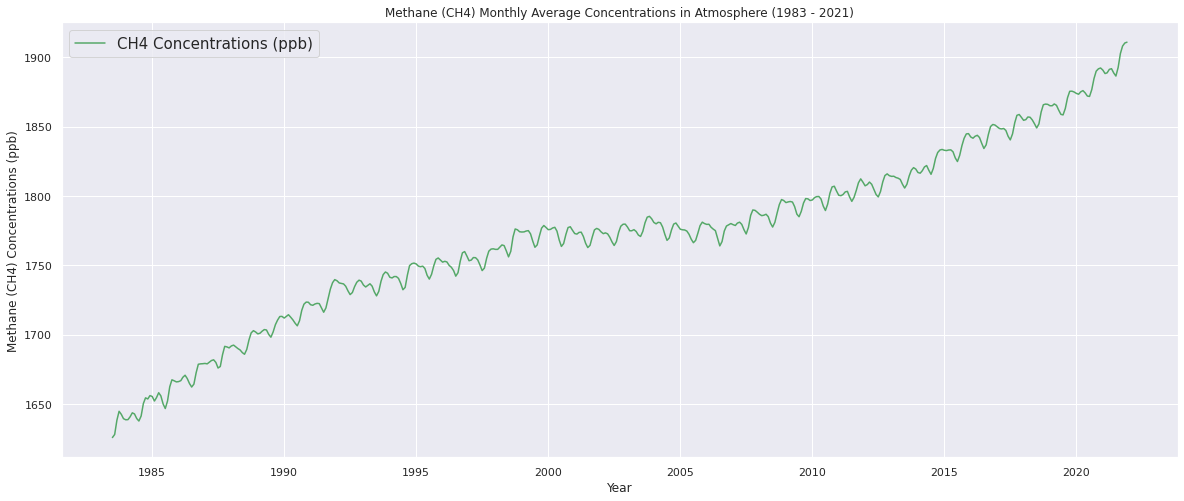

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Methane (CH4) Monthly Average Concentrations in Atmosphere (1983 - 2021)")
plt.xlabel('Year')
plt.ylabel('Methane (CH4) Concentrations (ppb)')
ch4_line = plt.plot(ch4Data['average'], color='g')
plt.legend((ch4_line), ("CH4 Concentrations (ppb)",), loc=0, prop={"size":15})
# plt.annotate(s="Start of\nIndustrial Revolution", xy=(1760,730), xytext=(1760,900), arrowprops=dict(facecolor='black', shrink=0.05), ha='center')

plt.show()

## Nitrous Oxide (N2O)

In [ ]:
n2oData['Date'] = pd.to_datetime(n2oData[['year', 'month']].assign(Day=15))
n2oData = n2oData.set_index('Date').to_period('M')
n2oData.index = n2oData.index.to_timestamp()
n2oData.head()

,year,month,decimal,average,average_unc,trend,trend_unc
Date,,,,,,,
2001-01-01,2001,1,2001.042,316.3,0.2,316.0,0.1
2001-02-01,2001,2,2001.125,316.3,0.2,316.1,0.1
2001-03-01,2001,3,2001.208,316.2,0.2,316.2,0.1
2001-04-01,2001,4,2001.292,316.1,0.1,316.2,0.1
2001-05-01,2001,5,2001.375,316.1,0.1,316.3,0.1


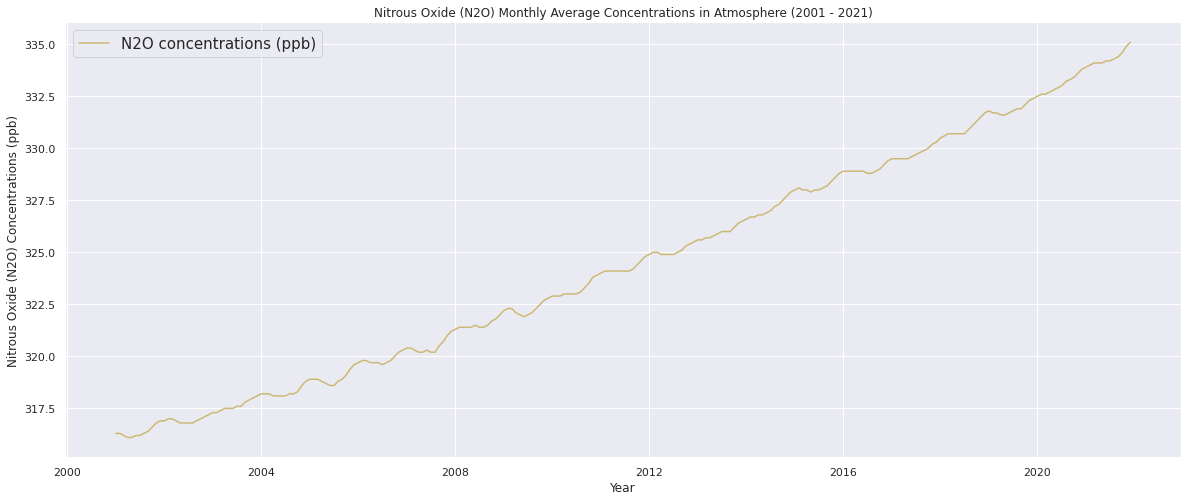

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Nitrous Oxide (N2O) Monthly Average Concentrations in Atmosphere (2001 - 2021)")
plt.xlabel('Year')
plt.ylabel('Nitrous Oxide (N2O) Concentrations (ppb)')
n2o_line = plt.plot(n2oData['average'], color='y')
plt.legend((n2o_line), ("N2O concentrations (ppb)",), loc=0, prop={"size":15})
#plt.annotate(s="Start of\nIndustrial Revolution", xy=(1760,272), xytext=(1760,280), arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
plt.show()

## CO2 and Temperature Change

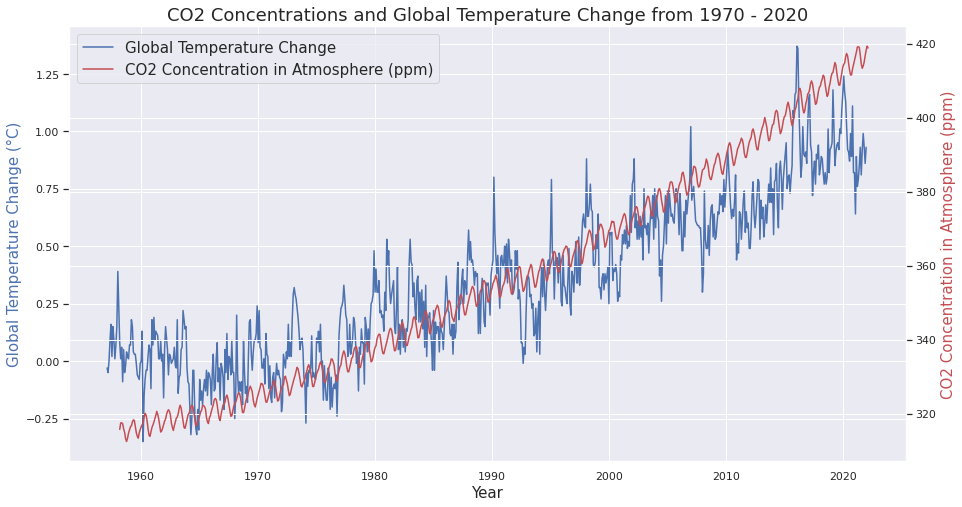

In [ ]:
# co2Data
# co2Data["average"]

fig, ax = plt.subplots(figsize = (15, 8))
ax2 = ax.twinx()

temp_line, = ax.plot(tempData['temperature_anomaly'].iloc[tempData.index > "1957"], color='b', label="Temperature Change")
co2_line, = ax2.plot(co2Data["average"], color="r")

plt.title('CO2 Concentrations and Global Temperature Change from 1970 - 2020', fontsize=18)
plt.legend((temp_line, co2_line), ("Global Temperature Change","CO2 Concentration in Atmosphere (ppm)"), loc=2, prop={"size":15})

ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('CO2 Concentration in Atmosphere (ppm)', fontsize = 15, color = 'r')

plt.show()

## CH4 and Temperature Change

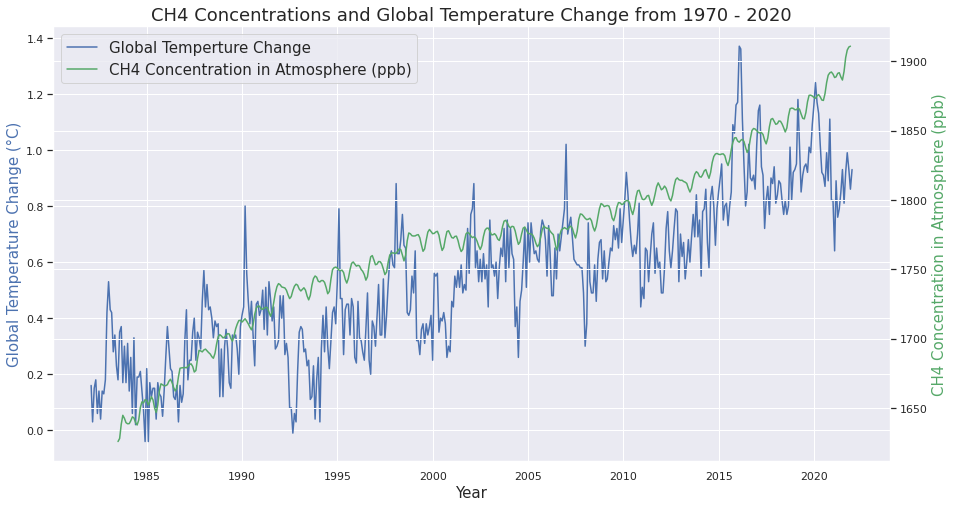

In [ ]:
fig, ax = plt.subplots(figsize = (15, 8))
ax2 = ax.twinx()

temp_line, = ax.plot(tempData['temperature_anomaly'].iloc[tempData.index > "1982"], color='b', label="Temperature Change")
ch4_line, = ax2.plot(ch4Data["average"], color="g")

plt.title('CH4 Concentrations and Global Temperature Change from 1970 - 2020', fontsize=18)
plt.legend((temp_line, ch4_line), ("Global Temperture Change", "CH4 Concentration in Atmosphere (ppb)"), loc=2, prop={"size":15})

ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('CH4 Concentration in Atmosphere (ppb)', fontsize = 15, color = 'g')

plt.show()

## N2O and Temperature Change

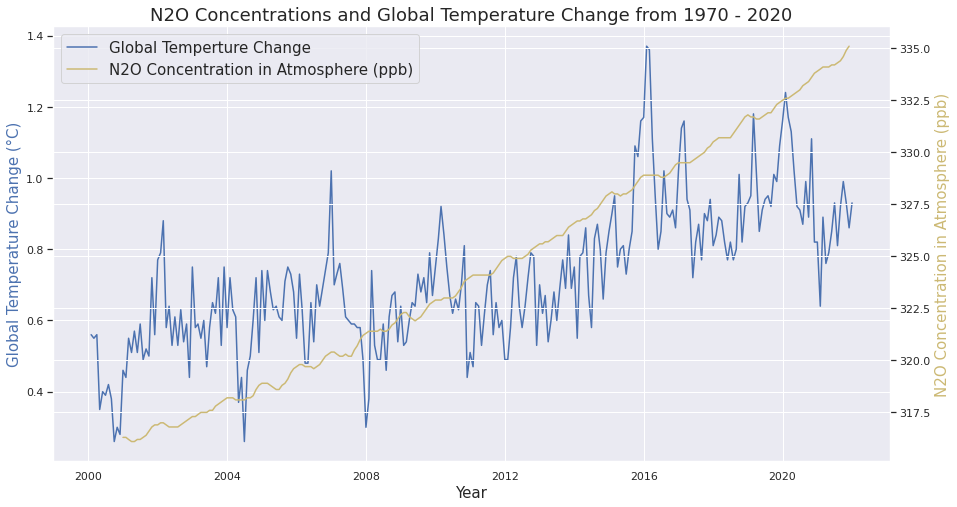

In [ ]:
fig, ax = plt.subplots(figsize = (15, 8))
ax2 = ax.twinx()

temp_line, = ax.plot(tempData['temperature_anomaly'].iloc[tempData.index > "2000"], color='b', label="Temperature Change")
n2o_line, = ax2.plot(n2oData["average"], color="y")

plt.title('N2O Concentrations and Global Temperature Change from 1970 - 2020', fontsize=18)
plt.legend((temp_line, n2o_line), ("Global Temperture Change","N2O Concentration in Atmosphere (ppb)"), loc=2, prop={"size":15})

ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Global Temperature Change (°C)', fontsize = 15, color = 'b')
ax2.set_ylabel('N2O Concentration in Atmosphere (ppb)', fontsize = 15, color = 'y')

plt.show()

## Correlations between Greenhouse Gases (CO2, CH4, N2O) and temperature

In [ ]:
corrData = pd.concat([tempData["temperature_anomaly"], co2Data["average"], ch4Data["average"], n2oData["average"]], axis=1)
corrData.set_axis(["Global Temperature Change","Carbon Dioxide (CO2)", "Methane (CH4)", "Nitrous Oxide (N2O)"], axis=1, inplace=True)
corrData.corr()

,Global Temperature Change,Carbon Dioxide (CO2),Methane (CH4),Nitrous Oxide (N2O)
Global Temperature Change,1.000000,0.914129,0.832289,0.699443
Carbon Dioxide (CO2),0.914129,1.000000,0.955747,0.985570
Methane (CH4),0.832289,0.955747,1.000000,0.973205
Nitrous Oxide (N2O),0.699443,0.985570,0.973205,1.000000


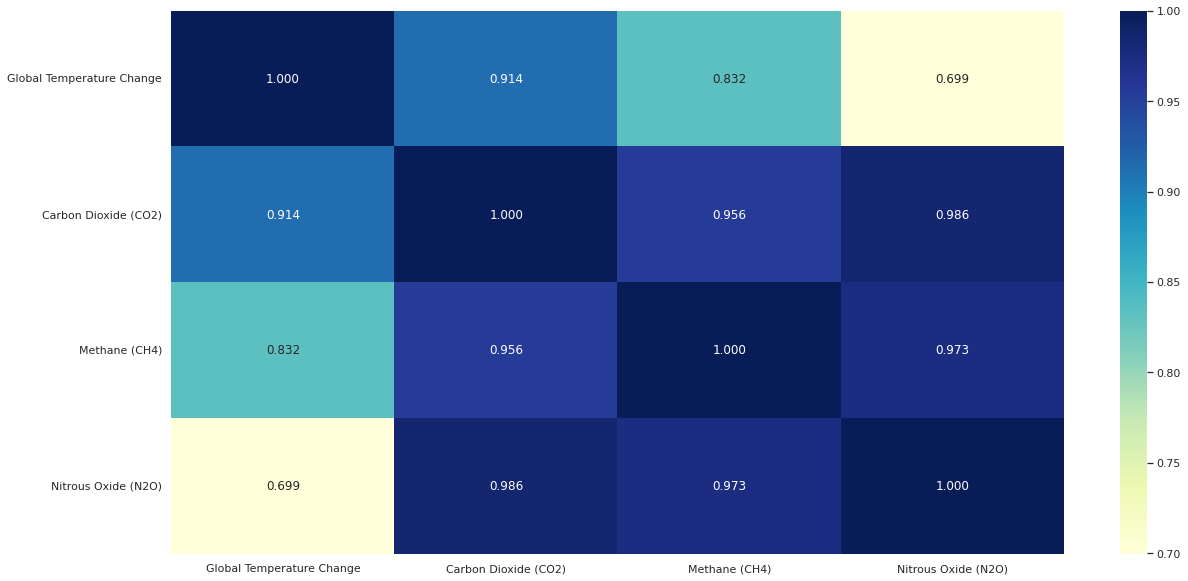

In [ ]:
fig, ax = plt.subplots(figsize=(20,10)) 
sb.heatmap(corrData.corr(), annot=True, fmt=".3f", cmap="YlGnBu")

**Observations**

From the EDA of the greenhhouse gases, we can make a few observations
1. The concentrations of each green house gases seem to be increasing over the years 
2. 


From this heatmap, we can make a few observations.

1. There is a strong positive correlation (r > 0.8)  between all three green house gases with temperature. 

2. C02 have the strongest correlation with temperature change at r = 0.952 as compared to CH4 and N20

3. CH4 have the weakest correlation with temperature change agt r = 0.874 as compared to C02 and N20

**Conclusion**
1. All three greenhouse gases have strong positive correlation with temperature.

  